Generating validation split: 100%|██████████| 10570/10570 [00:00<00:00, 225006.94 examples/s]


Dataset structure:
DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})
Training examples: 87599
Validation examples: 10570
\nExample:
Context: Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden...
Question: To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?
Answer: {'text': ['Saint Bernadette Soubirous'], 'answer_start': [515]}


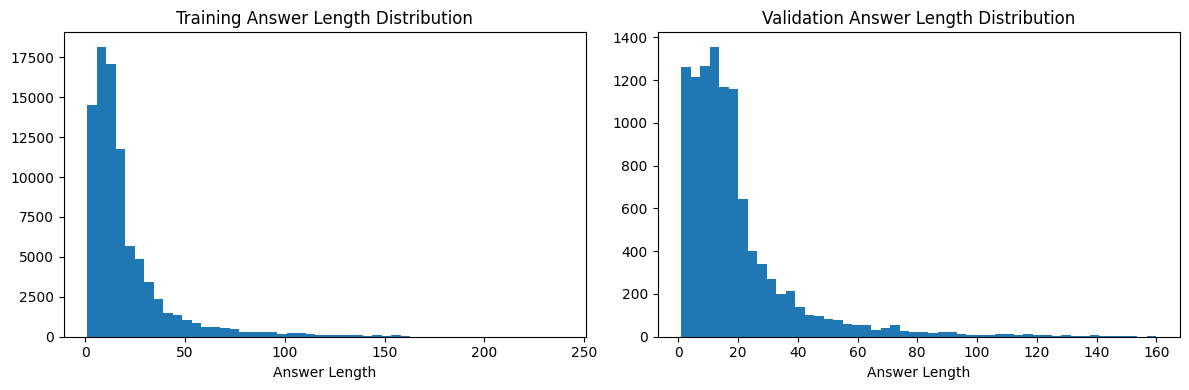

In [7]:
"""
Exploratory Data Analysis for SQuAD dataset
"""

from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

def explore_dataset():
    # Load dataset
    raw_datasets = load_dataset("squad")
    
    print("Dataset structure:")
    print(raw_datasets)
    
    # Basic statistics
    print(f"Training examples: {len(raw_datasets['train'])}")
    print(f"Validation examples: {len(raw_datasets['validation'])}")
    
    # Example analysis
    example = raw_datasets["train"][0]
    print("\\nExample:")
    print(f"Context: {example['context'][:100]}...")
    print(f"Question: {example['question']}")
    print(f"Answer: {example['answers']}")
    
    # Analyze answer lengths
    train_answers = [len(ans['text'][0]) for ans in raw_datasets["train"]["answers"]]
    val_answers = [len(ans['text'][0]) for ans in raw_datasets["validation"]["answers"]]
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.hist(train_answers, bins=50)
    plt.title("Training Answer Length Distribution")
    plt.xlabel("Answer Length")
    
    plt.subplot(1, 2, 2)
    plt.hist(val_answers, bins=50)
    plt.title("Validation Answer Length Distribution")
    plt.xlabel("Answer Length")
    
    plt.tight_layout()
    plt.savefig("answer_length_distribution.png")
    plt.show()
    
    return raw_datasets

if __name__ == "__main__":
    explore_dataset()